In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
dataset= pd.read_csv("assets/data/audio_dataset.csv", header= None)
dataset.head()

,0,1,2
0,-353.54886,90.192770,slider_abnormal
1,-348.44100,62.182060,slider_abnormal
2,-380.06805,69.027790,slider_abnormal
3,-360.74063,71.080220,slider_abnormal
4,-337.14594,99.502205,slider_abnormal


In [3]:
data_matrics = dataset.drop(2, axis = 1)
data_matrics.head()

,0,1
0,-353.54886,90.192770
1,-348.44100,62.182060
2,-380.06805,69.027790
3,-360.74063,71.080220
4,-337.14594,99.502205


In [4]:
data_matrics_normalized=(data_matrics-data_matrics.mean())/data_matrics.std()

In [5]:
kmeans = KMeans(n_clusters=3, init='k-means++').fit(data_matrics_normalized)
cluster_labels = pd.Series(kmeans.labels_, name='cluster')
# data_matrics = data_matrics.join(cluster_labels.to_frame())
# data_matrics.tail()

In [6]:
metrics.fowlkes_mallows_score(dataset.iloc[:,-1], kmeans.labels_)

0.7294775098080776

In [9]:
data_matrics_kmean = data_matrics_normalized.join(cluster_labels.to_frame())

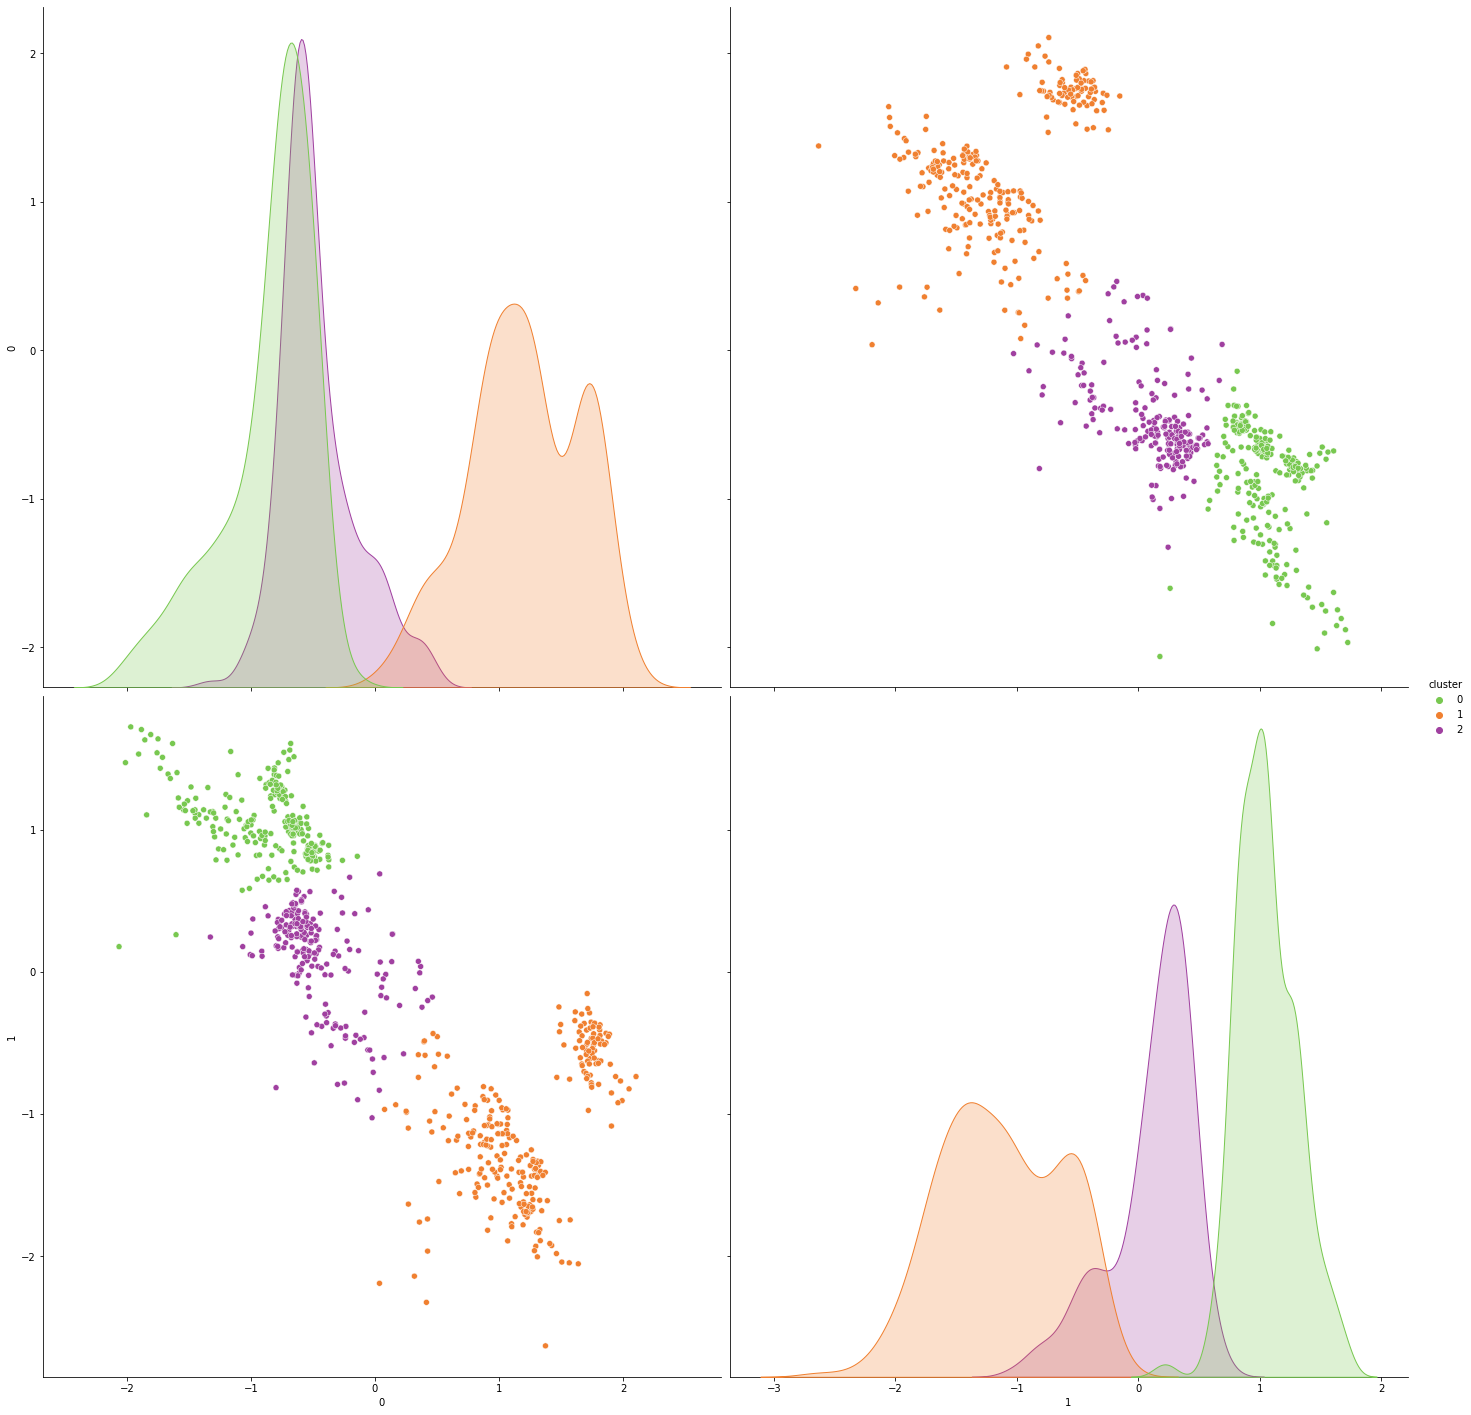

In [10]:
sns.pairplot(data_matrics_kmean, hue = 'cluster', palette=['#78C850', '#F08030','#A040A0'], height= 10)

In [11]:
validation_dataset= pd.read_csv("assets/data/validation_dataset.csv", header= None)
validation_dataset=validation_dataset.iloc[:,0:2]
validation_dataset=(validation_dataset-validation_dataset.mean())/validation_dataset.std()

In [12]:
prediction=kmeans.predict(validation_dataset)
prediction

array([0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0,
       2, 2, 2, 0, 2, 2, 2, 1, 2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], d

In [13]:
from sklearn.cluster import DBSCAN

DBSCANCluster= DBSCAN(eps=0.5, min_samples=5)
DBSCANCluster.fit(data_matrics_normalized)
cluster_labels = pd.Series(DBSCANCluster.labels_, name='cluster')

In [14]:
cluster_labels.value_counts()

 0    754
-1      2
Name: cluster, dtype: int64

In [15]:
metrics.fowlkes_mallows_score(dataset.iloc[:,-1], DBSCANCluster.labels_)

0.7410270956552047

In [16]:
from sklearn.cluster import SpectralClustering


In [24]:
SpecCluster= SpectralClustering(n_clusters=3, assign_labels='discretize')
SpecCluster.fit(data_matrics_normalized)
cluster_labels = pd.Series(SpecCluster.labels_, name='cluster')

In [25]:
cluster_labels[256:].value_counts()

0    466
2     34
Name: cluster, dtype: int64

In [26]:
data_matrics_spec = data_matrics_normalized.join(cluster_labels.to_frame())

In [20]:
data_matrics_spec

,0,1,cluster
0,1.466760,-0.742954,0
1,1.574469,-1.745968,0
2,0.907548,-1.500835,0
3,1.315106,-1.427341,0
4,1.812649,-0.409599,0
...,...,...,...
751,-0.884595,0.982949,1
752,-0.484903,0.088508,1
753,-0.538806,0.789771,1
754,-1.536183,1.180056,1


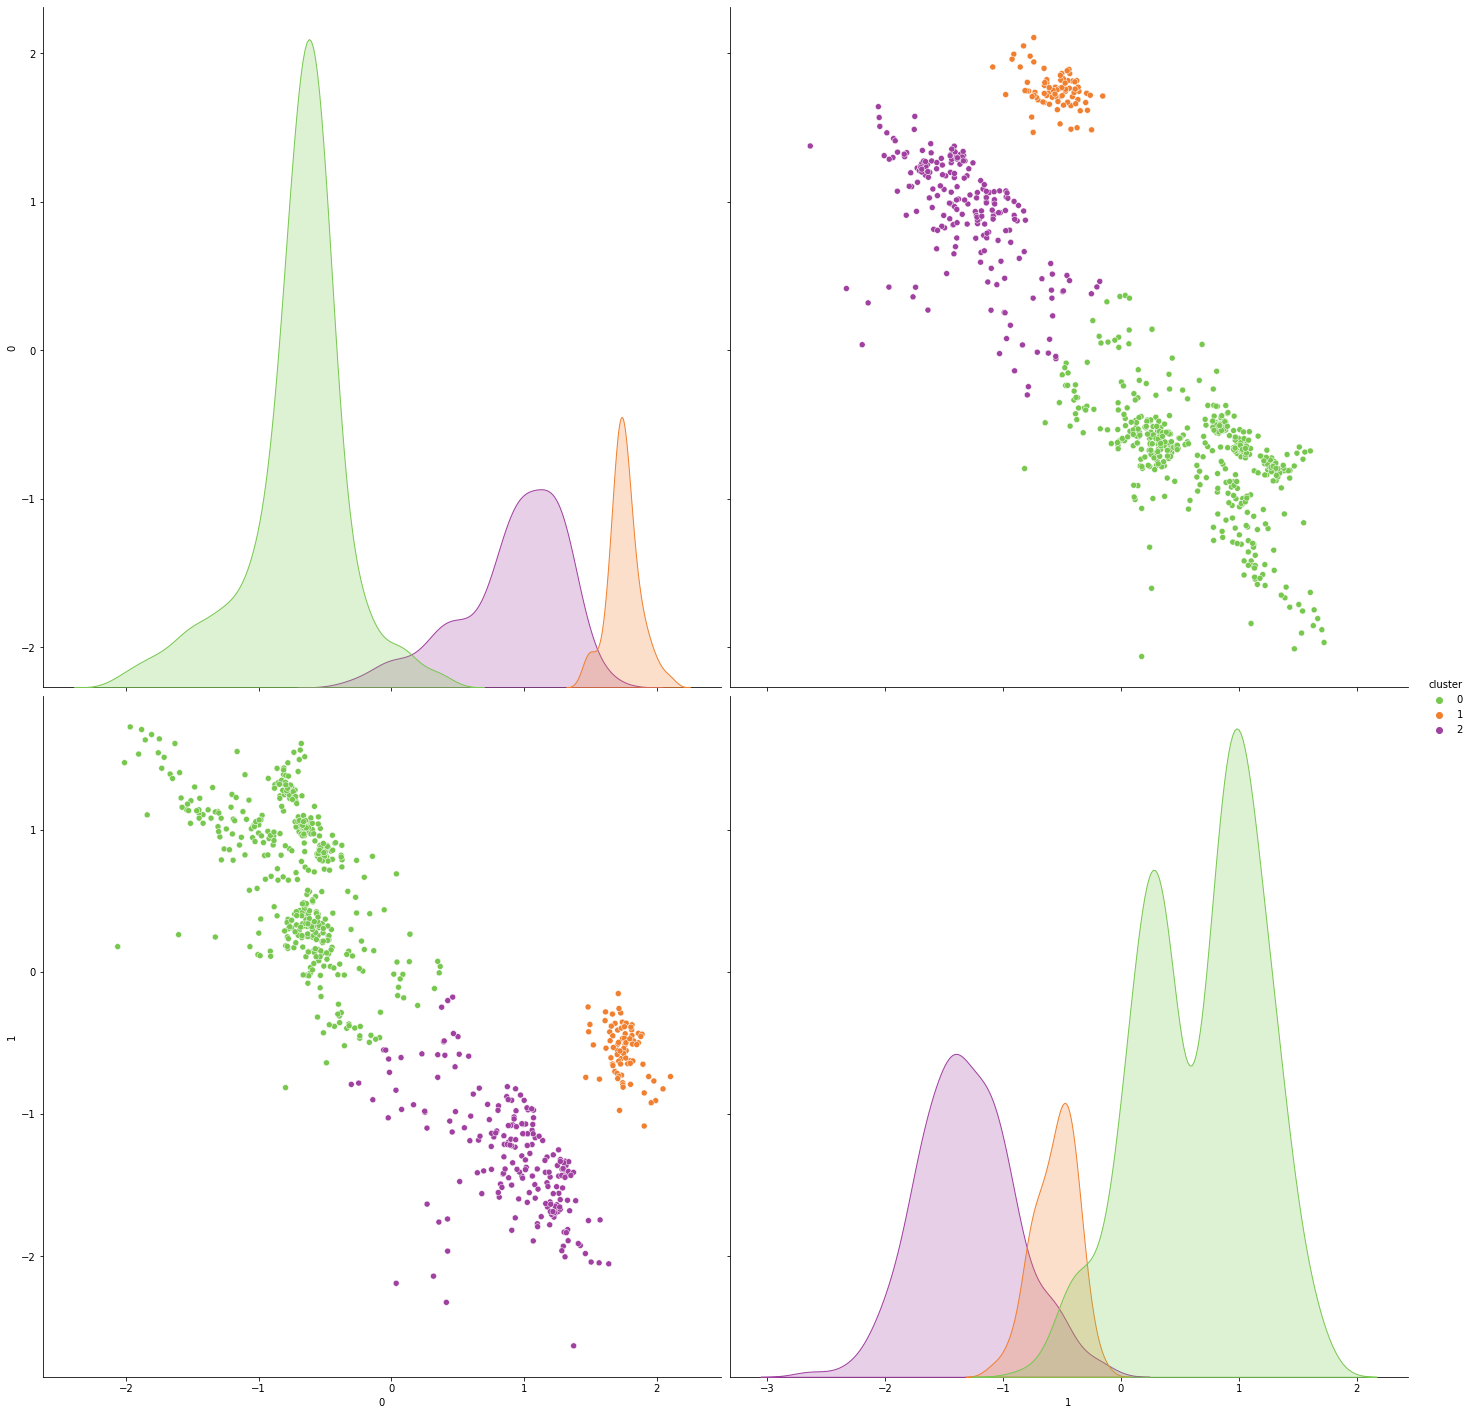

In [28]:
sns.pairplot(data_matrics_spec, hue = 'cluster', palette=['#78C850', '#F08030', '#A040A0'], height= 10)

In [22]:
# iner=[]
# for k in range(1,10):
#     kmeans = KMeans(n_clusters=k, init='k-means++').fit(data_matrics)
#     iner.append(kmeans.inertia_)
#     cluster_labels = pd.Series(kmeans.labels_, name='cluster')

In [23]:
import matplotlib.pyplot as plt

plt.plot(range(1,10), iner)
plt.show()

NameError: name 'iner' is not defined